In [329]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Listings data 
Seem to be most informative, so let's start with reading and preliminary analysis

In [330]:
listings_df = pd.read_csv('data/listings.csv')
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [331]:
# Number of rows 
listings_df.shape[0]

3818

In [332]:
# Get info about columns. Those with number of non-null object less than n_rows contain NaN values  
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

We need to convert string data in 'price' column into integers (rounded to dollar amount)
But because of dollar sign `$` and comma characters present in strings, the simple .astype() method won't work.
So we will first strip these strings of '$'and ',', then apply .astype() transform
(https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas recipe)

In [333]:
listings_df['price'] = listings_df['price'].str.replace("[$,]", "").astype("float").astype("int")


Several columns have apparent True/False values, which are represent by `t`/`f` characters.
We can use `.apply()` method with a lambda function which makes the appropriate mapping 

In [334]:
tf_columns = ['requires_license', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

for col in tf_columns: 
    listings_df[col] = listings_df[col].apply( lambda s: True if s=='t' else False ) 
    
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,False,NaN,WASHINGTON,False,moderate,False,False,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,False,NaN,WASHINGTON,False,strict,True,True,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,False,NaN,WASHINGTON,False,strict,False,False,2,1.15


In [379]:
listings_df[listings_df['id']==3594885].minimum_nights

2617    1000
Name: minimum_nights, dtype: int64

## Reviews data

In [335]:
reviews_df = pd.read_csv('data/reviews.csv')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [336]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


We see, that `date` column contains strings, so we need to convert them to datetime 

In [337]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

In [338]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null datetime64[ns]
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB


In [378]:
reviews_df[reviews_df['listing_id'] == 3594885]

,listing_id,id,date,reviewer_id,reviewer_name,comments
30347,3594885,16931898,2014-08-04,7978992,Anthony,"The unit was as advertised, clean, and well ma..."
30348,3594885,18921106,2014-09-02,3404759,Jeff,Matan is a great host! He is very quick to res...
30349,3594885,20042434,2014-09-22,20895668,Hunter,"Neighborhood's cool. To us, it appeared to be ..."
30350,3594885,26683496,2015-02-17,8761045,Kaitlan,My girlfriends and I wanted to escape to Seatt...
30351,3594885,28824218,2015-03-30,29247667,Zubin,"The condo location is fantastic, can't be beat..."
30352,3594885,31065114,2015-05-01,28249634,Stephen,"Stayed at Matan's place for 5 nights, two week..."
30353,3594885,31918482,2015-05-11,12521952,Jason,Great place and location! Matan was a fantasti...
30354,3594885,32285931,2015-05-16,21603525,Shawn,The perfect location for staying in Seattle. Y...


## Calendar data

In [339]:
calendar_df = pd.read_csv('data/calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [340]:
calendar_df['available'] = calendar_df['available'].apply( lambda s: True if s=='t' else False ) 

In [385]:
calendar_df.groupby('listing_id').count()

,date,available,price
listing_id,,,
3335,365,365,309
4291,365,365,365
5682,365,365,309
6606,365,365,365
7369,365,365,53
9419,365,365,365
9460,365,365,57
9531,365,365,180
9534,365,365,262


In [391]:
calendar_df[calendar_df['listing_id'] == 1157083] 

,listing_id,date,available,price
607360,1157083,2016-01-04,False,NaN
607361,1157083,2016-01-05,False,NaN
607362,1157083,2016-01-06,False,NaN
607363,1157083,2016-01-07,False,NaN
607364,1157083,2016-01-08,False,NaN
607365,1157083,2016-01-09,False,NaN
607366,1157083,2016-01-10,False,NaN
607367,1157083,2016-01-11,False,NaN
607368,1157083,2016-01-12,False,NaN
607369,1157083,2016-01-13,False,NaN


# Estimating Property Revenue

The idea of estimating the Property Revenue is taken from: 

https://towardsdatascience.com/airbnb-in-seattle-data-analysis-8222207579d7

The only data we have about the actual bookings of a property are the reviews.cvs.
This table contains all reviews from guests who stayed at a particular property, which can be identified by `listing_id`.
We can assume that each review was a result of a single booking. For each booking, a guest would stay at the property at least `minimum nights`, which is a column in `listing_df`. 
Hence, for each review we can estimate the lower bound of Property Revenue associated with this booking. 

We can obtain the dataframe of bookings data by joining `reviews_df` and `listings_df` on `listing_id` and `id` correspondingly.

Then the estimated revenue of each booking can be obtained as the product of `price` and `minimum_nights` columns



In [341]:
# To make joining easier, rename id column in listings_df to listing_id, as in reviews_df 
#listings_df.rename(columns={'id':'listing_id'}, inplace=True)

In [342]:
bookings_df = pd.merge(reviews_df, listings_df, left_on='listing_id', right_on='id')

bookings_df['estimated_revenue'] = bookings_df['price'] * bookings_df['minimum_nights']
bookings_df['estimated_revenue'].head(3) 

0    150
1    150
2    150
Name: estimated_revenue, dtype: int64

For each property (listing), find the estimated revenue as sum of bookings estimated revenues   

In [343]:
total_revenue_per_listing_df = bookings_df[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()
total_revenue_per_listing_df.head()

,estimated_revenue
listing_id,
4291,5740
5682,42768
6606,9360
7369,3400
9419,14220


Now we can merge `total_revenue_per_listing_df` into `listings_df`


In [344]:
listings_df = pd.merge(listings_df, total_revenue_per_listing_df, left_on='id', right_on='listing_id', how='left')

In [345]:
listings_df['estimated_revenue'].count()

3191

There is a small number of listings with no estimated revenue, we can just replace NaN values with zeros 

In [346]:
listings_df['estimated_revenue'].fillna(0, inplace = True) 

## Estimated Monthly revenue

To understand how much a particular property can fetch monthly, we need divide estimated revenu on the total number of months that property was available.


In [347]:
# Group the data for each single property in calendar_df and sum 'available' for each group
active_month_num = calendar_df[['listing_id', 'available']].groupby('listing_id').sum()

In [348]:
# Merge the result into listings_df and rename the new column as 'total_months_on_market'  
listings_df = pd.merge(listings_df, active_month_num, left_on='id', right_on='listing_id', how='left')
listings_df.rename(columns={'available':'total_months_on_market'}, inplace=True)

In [349]:
listings_df.shape[0]

3818

In [350]:
# Drop the listings with 0 'total_months_on_market' : they were never available for renting
# Also drop the listings with 0 'estimated_revenue' : there were no reviews and we could not get estimation for revenu
listings_df = listings_df[(listings_df['total_months_on_market'] != 0) & (listings_df['estimated_revenue'] != 0)]

In [351]:
# Set a new column: 'estimated_monthly_revenu'  
listings_df['estimated_monthly_revenu'] = listings_df['estimated_revenue'] / listings_df['total_months_on_market'] 

In [392]:
# Group the data for each single property in calendar_df and sum 'available' for each group
non_occupied_num = calendar_df[['listing_id', 'available']].groupby('listing_id').sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C020365F8>]],
      dtype=object)

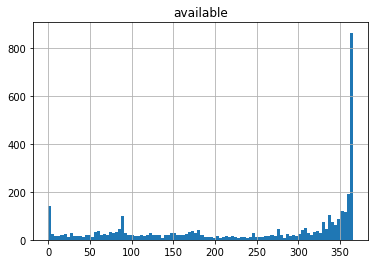

In [395]:
non_occupied_num.hist(bins=100)

# Business Insights 


## 1. What are the neighbourhoods which can be recommended for prospective hosts as generating the maximum revenue? 

Having prepared `estimated_revenue` data in `listings_df`, all we need to do is:
1. Group listings by `neighbourhood_group_cleansed`
2. Find mean `estimated_revenue`
3. Sort by `estimated_revenue` in descending order

In [352]:
best_neighbourhoods_for_hosts = listings_df[['neighbourhood_group_cleansed', 'estimated_revenue']]. \
                    groupby('neighbourhood_group_cleansed').mean().sort_values('estimated_revenue', ascending=False)

best_neighbourhoods_for_hosts.head(10) 

,estimated_revenue
neighbourhood_group_cleansed,
Capitol Hill,8776.295302
Downtown,8361.726667
Beacon Hill,7696.178218
Ballard,7230.518325
Queen Anne,7225.162602
Cascade,5728.079365
Central Area,5401.231511
Other neighborhoods,5300.389490
Magnolia,4656.531915


This table can be used to project property revenue for prospective hosts in various neighbourhoods


Let's show best neigbourhoods on an approximate map

In [353]:
# Color Mapping function: neighbourhood_group_cleansed --> color index

def color_map(row):
    # Uses globally defined best_neighbourhoods_for_hosts dataframe
    neib = row['neighbourhood_group_cleansed']
    if neib == best_neighbourhoods_for_hosts.index[0]:   # 'Downtown':
        return 3
    elif neib == best_neighbourhoods_for_hosts.index[1]: # 'Capitol Hill':
        return 2
    elif neib == best_neighbourhoods_for_hosts.index[2]: # 'Beacon Hill':
        return 1
    else:
        return 0

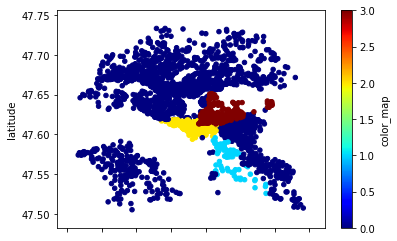

In [354]:
# Copy necessary columns
to_plot = listings_df[['neighbourhood_group_cleansed', 'longitude', 'latitude']].copy()
# Create a new column with a colormap
to_plot['color_map'] = to_plot.apply(color_map, axis='columns')

to_plot.plot.scatter(x='longitude', y='latitude', c='color_map', colormap='jet')

## 2. What are the busiest months for renters?

Here we may produce 2 distributions:
1. number of bookings by month
2. estimated revenues by month

To get the first distribution, we can use `reviews_df`, group the data by month and count records in each group

In [355]:
bookings_by_month = reviews_df['date'].groupby(reviews_df['date'].dt.month).count()

Representing this series by bar plot helps to see the evident trend: second half of the summer and early fall are the busies seasons for hosts

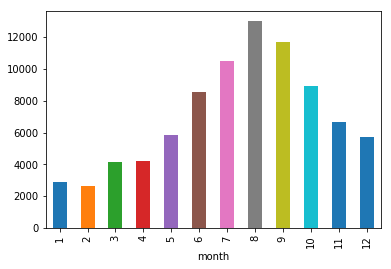

In [356]:
bookings_by_month.index.names =  ['month']
bookings_by_month.plot.bar()

To get the distrubution of estimated revenues by month, we can use the columns `date` and `estimated_revenue` from `bookings_df`dataframe. 
Group by month in `data` and compute sum in each group   

In [360]:
revenue_by_month = bookings_df[['date','estimated_revenue']].groupby(bookings_df["date"].dt.month).sum()
revenue_by_month

,estimated_revenue
date,
1,615071
2,737003
3,1073391
4,1028092
5,1755773
6,1991564
7,2425408
8,3153118
9,2818165


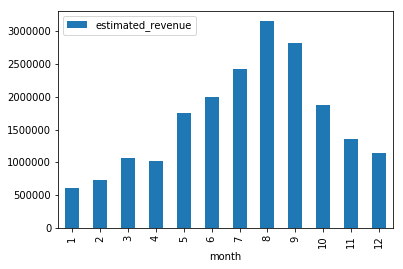

In [361]:
revenue_by_month.index.names =  ['month']
revenue_by_month.plot.bar()

We see that estimated revenues are also maximal in the same period as the number of bookings: second half of the summer and early fall. 

## 3. Predicting Estimated Monthly Revenue

In [327]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3121 entries, 0 to 3814
Data columns (total 95 columns):
id                                  3121 non-null int64
listing_url                         3121 non-null object
scrape_id                           3121 non-null int64
last_scraped                        3121 non-null object
name                                3121 non-null object
summary                             2954 non-null object
space                               2796 non-null object
description                         3121 non-null object
experiences_offered                 3121 non-null object
neighborhood_overview               2390 non-null object
notes                               1944 non-null object
transit                             2477 non-null object
thumbnail_url                       2866 non-null object
medium_url                          2866 non-null object
picture_url                         3121 non-null object
xl_picture_url                      2866

In [401]:
listings_df1 = listings_df[listings_df['id'] != 3594885]

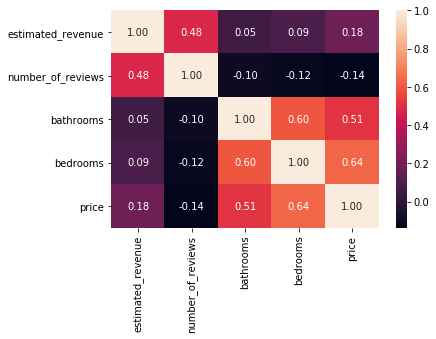

In [405]:
sns.heatmap(listings_df1[['estimated_revenue', 'number_of_reviews', 'bathrooms', 'bedrooms', 'price']].corr(), annot=True, fmt=".2f");


In [387]:
listings_df1[['id','estimated_revenue', 'bathrooms', 'bedrooms', 'price']].sort_values('estimated_revenue', ascending=False)

,id,estimated_revenue,bathrooms,bedrooms,price
2617,3594885,1200000.0,1.0,1.0,150
2107,5056580,306900.0,1.0,1.0,99
1500,4009508,266000.0,2.0,2.0,350
1537,1954452,218680.0,1.0,1.0,220
1519,3971934,171840.0,1.0,1.0,179
813,723723,151900.0,1.0,1.0,155
1631,2825852,132328.0,1.0,1.0,139
2892,4009295,104104.0,1.0,1.0,169
1070,3385421,103602.0,2.5,2.0,557
2,3308979,78000.0,4.5,5.0,975


In [398]:
listings_df[listings_df['id']==4291]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,estimated_revenue,total_months_on_market,estimated_monthly_revenu
3118,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,NaN,...,WASHINGTON,False,moderate,False,False,5,1.14,5740.0,365.0,15.726027
